In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [231]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null float64
Married              611 non-null object
Dependents           614 non-null float64
Education            614 non-null int64
Self_Employed        614 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(7), int64(2), object(4)
memory usage: 62.4+ KB


In [233]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [234]:
import pandas_profiling

In [235]:
pro = pandas_profiling.ProfileReport(df)

In [236]:
pro

Number of variables,13
Number of observations,614
Total Missing (%),0.9%
Total size in memory,62.4 KiB
Average record size in memory,104.1 B
Numeric,6
Categorical,3
Boolean,3
Date,0
Text (Unique),1
Rejected,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F435D9B630>,
      dtype=object)

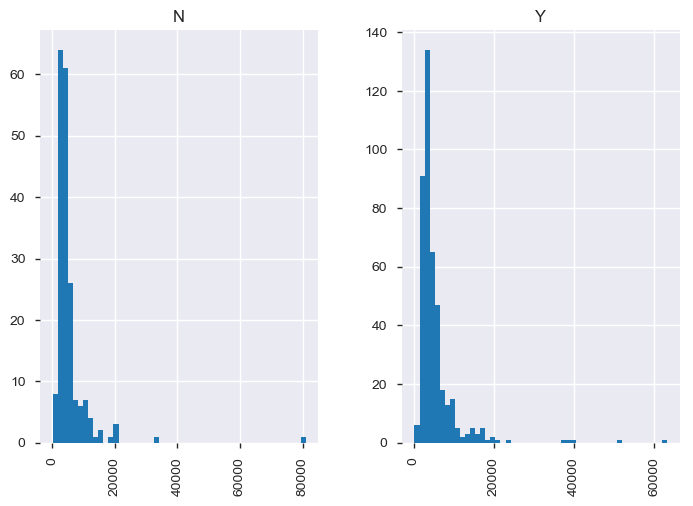

In [237]:
df[['Loan_Status','ApplicantIncome']].hist(bins = 50,by = 'Loan_Status')

In [238]:
coapplicants = df['CoapplicantIncome']

In [239]:
coapplicants.head()

0       0.0
1    1508.0
2       0.0
3    2358.0
4       0.0
Name: CoapplicantIncome, dtype: float64

In [240]:
def nome_funcao(x):
    if x==0:
        return 'N'
    else:
        return 'Y'

In [241]:
coapplicants = coapplicants.apply(lambda x: 'N' if x == 0 else 'Y')

In [242]:
coapplicants.value_counts()

Y    341
N    273
Name: CoapplicantIncome, dtype: int64

In [243]:
pd.get_dummies(coapplicants)

,N,Y
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [244]:
df.drop('Loan_ID',axis = 1,inplace = True)

In [245]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [246]:
df.columns = ['is_Male','is_Married','is_Dependents','is_Graduated','is_Self_Employed','ApplicantIncome','CoapplicantIncome',
              'LoanAmount','Loan_Amount_Term','has_Credit_History','Property_Area','Loan_Status']

In [247]:
df

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,1.0,Yes,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,1.0,Yes,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,1.0,Yes,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,1.0,Yes,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,1.0,Yes,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [248]:
mapper = {'Yes': 1,'No':0}

In [249]:
df['is_Married'] = df['is_Married'].map(mapper)

In [250]:
df.head()

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [251]:
mapper2 = {'Y':1,'N':0}

In [252]:
df['Loan_Status'] = df['Loan_Status'].map(mapper2)

In [253]:
df.head()

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [254]:
df.isnull().sum().sort_values(ascending = False)

has_Credit_History    50
LoanAmount            22
is_Married             3
Loan_Status            0
Property_Area          0
Loan_Amount_Term       0
CoapplicantIncome      0
ApplicantIncome        0
is_Self_Employed       0
is_Graduated           0
is_Dependents          0
is_Male                0
dtype: int64

In [255]:
df.dropna(subset = ['is_Married'],inplace = True)

In [256]:
df['LoanAmount'].fillna(np.mean(df['LoanAmount']),inplace = True)

In [257]:
df['has_Credit_History'].value_counts()

1.0    472
0.0     89
Name: has_Credit_History, dtype: int64

In [258]:
df['has_Credit_History'].fillna(1,inplace = True)

In [259]:
df.shape

(611, 12)

In [260]:
df.head()

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [261]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [262]:
df[df['Property_Area'].unique().tolist()] = pd.get_dummies(df['Property_Area'])

In [263]:
df.head()

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status,Urban,Rural,Semiurban
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,Urban,1,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1,0,0,1


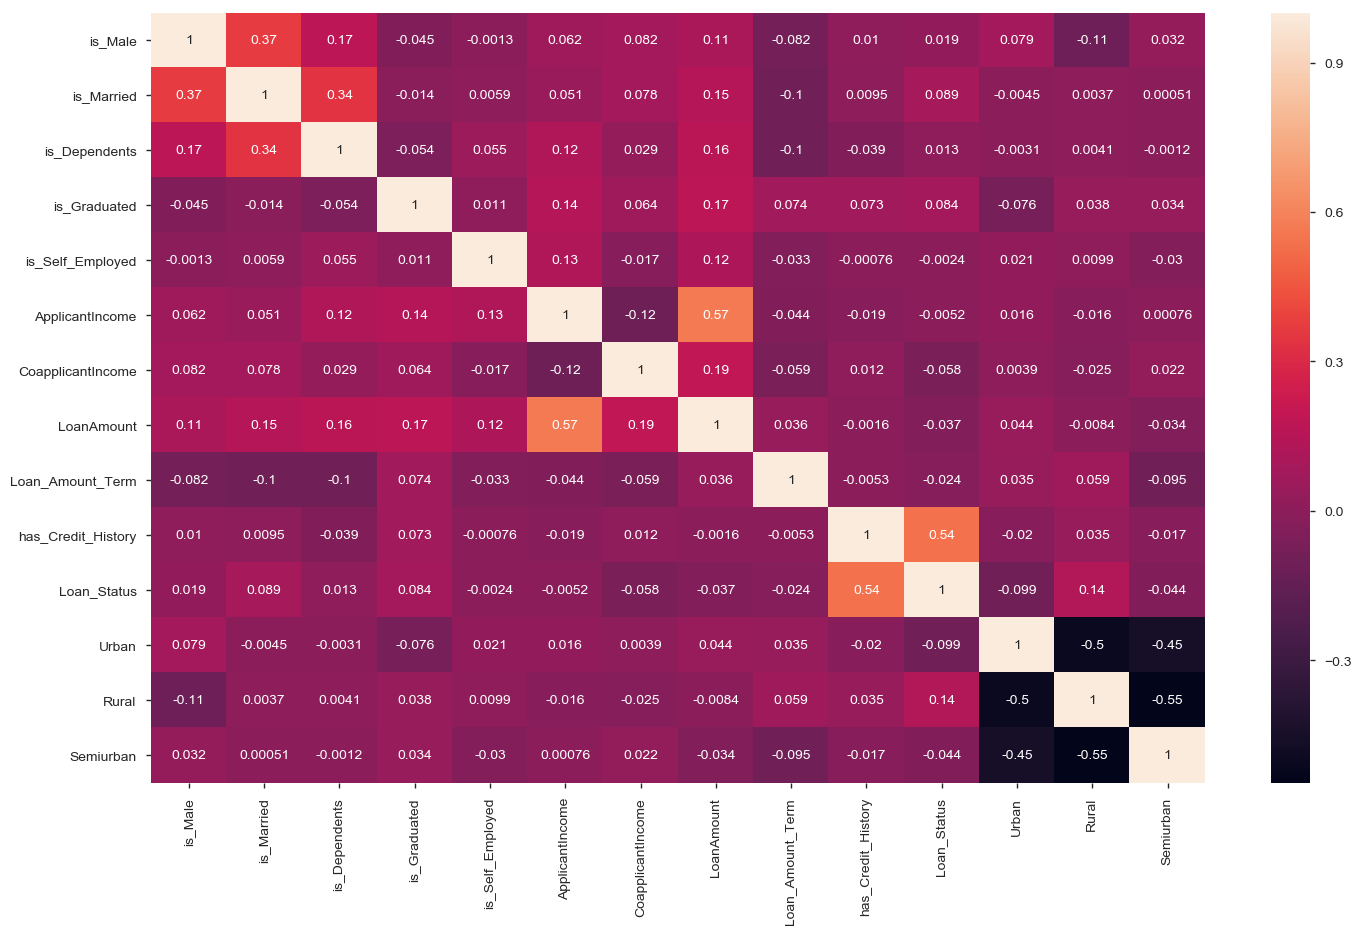

In [264]:
from matplotlib.colors import ListedColormap
flatui = ['#FF0000','#E34646','#FFFFFF','#E34646','#FF0000']
cmap = ListedColormap(sns.color_palette(flatui).as_hex())
plt.figure(figsize = (17,10))
sns.heatmap(df.corr(), annot = True)

In [265]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [266]:
df.drop('Property_Area',axis =1, inplace = True)

In [267]:
df

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Urban,Rural,Semiurban,TotalIncome
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1,5849.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,6091.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1,3000.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,4941.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,6000.0
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.000000,360.0,1.0,1,0,0,1,9613.0
6,1.0,1.0,0.0,0,0.0,2333,1516.0,95.000000,360.0,1.0,1,0,0,1,3849.0
7,1.0,1.0,3.0,1,0.0,3036,2504.0,158.000000,360.0,0.0,0,0,1,0,5540.0
8,1.0,1.0,2.0,1,0.0,4006,1526.0,168.000000,360.0,1.0,1,0,0,1,5532.0
9,1.0,1.0,1.0,1,0.0,12841,10968.0,349.000000,360.0,1.0,0,0,1,0,23809.0


In [268]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])
df.loc[df['CoapplicantIncome'] == 0,'CoapplicantIncome'] =1
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 613
Data columns (total 15 columns):
is_Male               611 non-null float64
is_Married            611 non-null float64
is_Dependents         611 non-null float64
is_Graduated          611 non-null int64
is_Self_Employed      611 non-null float64
ApplicantIncome       611 non-null float64
CoapplicantIncome     611 non-null float64
LoanAmount            611 non-null float64
Loan_Amount_Term      611 non-null float64
has_Credit_History    611 non-null float64
Loan_Status           611 non-null int64
Urban                 611 non-null uint8
Rural                 611 non-null uint8
Semiurban             611 non-null uint8
TotalIncome           611 non-null float64
dtypes: float64(10), int64(2), uint8(3)
memory usage: 63.8 KB


In [270]:
X = df.drop('Loan_Status',axis = 1)
y = df['Loan_Status']

In [271]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [272]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [273]:
print(lr.score(X_train,y_train))

0.80440097799511


In [274]:
print(lr.score(X_test,y_test))

0.8217821782178217


In [281]:
dt= DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [282]:
print(dt.score(X_train,y_train))

0.8264058679706602


In [283]:
print(dt.score(X_test,y_test))

0.8316831683168316


In [294]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [295]:
print(rf.score(X_test,y_test))

0.806930693069307


In [297]:
print(rf.score(X_train,y_train))

0.980440097799511


In [300]:
dt.predict([X_test.iloc[0]])

array([1], dtype=int64)

In [301]:
X_test['Loan_Status'] = dt.predict(X_test)

C:\Users\LucasEnock\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [302]:
X_test.to_csv('Clientes_previstos.csv',index = False)

In [304]:
X_test.head()

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Urban,Rural,Semiurban,TotalIncome,Loan_Status
81,1.0,1.0,1.0,1,1.0,7.781139,0.000000,146.369492,360.0,1.0,0,1,0,7.781139,1
219,0.0,1.0,2.0,1,0.0,8.362409,7.776115,127.000000,360.0,1.0,0,1,0,8.804775,1
55,1.0,1.0,2.0,1,0.0,7.903966,7.062192,97.000000,360.0,1.0,0,1,0,8.262301,1
602,1.0,1.0,3.0,1,0.0,8.648748,0.000000,128.000000,360.0,1.0,0,0,1,8.648748,1
266,1.0,1.0,2.0,1,0.0,8.457018,7.234898,150.000000,360.0,1.0,0,1,0,8.715224,1


In [ ]:
import pickle